Author: zihaophys 


Description: This notebook is a python code for 


reproducing moire bands fig in MacDonald's PNAS2010.


It is mainly modified from moireBands.py

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 5.00           #degree
omega  = 110.7          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2970     #meV*angstrom, Fermi velocity for SLG
N      = 5              #truncate range
valley = -1             #+1 for K, -1 for K'
KDens  = 100            #density of k points, 100 is good.

#tune parameters
theta  = theta/180.0*np.pi 
I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

b1m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
b2m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
qb     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([0, -1])
K1     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

#define Lattice
L = []
invL = np.zeros((2*N+1, 2*N+1), int)
def Lattice(n):
    count = 0
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])
            invL[i+n, j+n] = count
            count = count + 1
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])

Lattice(N)
siteN = (2*N+1)*(2*N+1)
L = np.array(L)
def Hamiltonian(kx, ky):
    H = array(zeros((4*siteN, 4*siteN)), dtype=complex)
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax + sin(theta/2) * ay
        qy =-sin(theta/2) * ax + cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N):
            j = invL[ix+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax - sin(theta/2) * ay
        qy = sin(theta/2) * ax + cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N)):
            j = invL[ix+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]


    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
#    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e

In [2]:
kD = -qb[1]

AtoB = np.arange(-1/2, 1/2, 1/KDens)
BtoC = np.arange(-1, 0, 1/KDens)
CtoD = np.arange(0, sqrt(3), 1/KDens)
DtoA = np.arange(0, 1, 1/KDens)

AllK  = len(AtoB) + len(BtoC) + len(CtoD) + len(DtoA)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0, len(AtoB)):
    k = AtoB[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD, k*kD))
for i in range(len(AtoB), len(AtoB)+len(BtoC)):
    k = BtoC[i-len(AtoB)]
    E[i] = np.real(Hamiltonian(0, k*kD))
for i in range(len(AtoB)+len(BtoC), len(AtoB)+len(BtoC)+len(CtoD)):
    k = CtoD[i-len(AtoB)-len(BtoC)]
    E[i] = np.real(Hamiltonian(1.0/2*k*kD, -k*sqrt(3)/2*kD))
for i in range(len(AtoB)+len(BtoC)+len(CtoD), AllK):
    k = DtoA[i-len(AtoB)-len(BtoC)-len(CtoD)]
    E[i] = np.real(Hamiltonian(-sqrt(3)/2*k*kD, -1/2*k*kD))


%matplotlib qt

for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-2000,2000)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

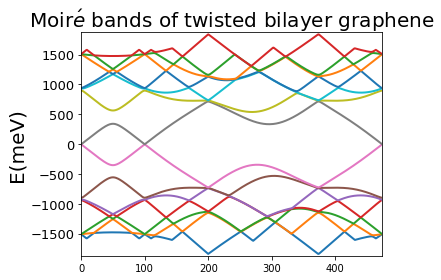

In [7]:
%matplotlib inline
for j in range(siteN+120-6,3*siteN-120+6):    
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-1870,1870)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

In [25]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.05           #degree
omega  = 110.7          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2970     #meV*angstrom, Fermi velocity for SLG
N      = 10              #truncate range
valley = -1             #+1 for K, -1 for K'
KDens  = 100            #density of k points, 100 is good.

#tune parameters
theta  = theta/180.0*np.pi 
I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

b1m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
b2m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
qb     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([0, -1])
K1     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

#define Lattice
L = []
invL = np.zeros((2*N+1, 2*N+1), int)
def Lattice(n):
    count = 0
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])
            invL[i+n, j+n] = count
            count = count + 1
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])

Lattice(N)
siteN = (2*N+1)*(2*N+1)
L = np.array(L)
def Hamiltonian(kx, ky):
    H = array(zeros((4*siteN, 4*siteN)), dtype=complex)
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax + sin(theta/2) * ay
        qy =-sin(theta/2) * ax + cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N):
            j = invL[ix+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax - sin(theta/2) * ay
        qy = sin(theta/2) * ax + cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N)):
            j = invL[ix+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]


    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
#    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e

kD = -qb[1]

AtoB = np.arange(-1/2, 1/2, 1/KDens)
BtoC = np.arange(-1, 0, 1/KDens)
CtoD = np.arange(0, sqrt(3), 1/KDens)
DtoA = np.arange(0, 1, 1/KDens)

AllK  = len(AtoB) + len(BtoC) + len(CtoD) + len(DtoA)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0, len(AtoB)):
    k = AtoB[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD, k*kD))
for i in range(len(AtoB), len(AtoB)+len(BtoC)):
    k = BtoC[i-len(AtoB)]
    E[i] = np.real(Hamiltonian(0, k*kD))
for i in range(len(AtoB)+len(BtoC), len(AtoB)+len(BtoC)+len(CtoD)):
    k = CtoD[i-len(AtoB)-len(BtoC)]
    E[i] = np.real(Hamiltonian(1.0/2*k*kD, -k*sqrt(3)/2*kD))
for i in range(len(AtoB)+len(BtoC)+len(CtoD), AllK):
    k = DtoA[i-len(AtoB)-len(BtoC)-len(CtoD)]
    E[i] = np.real(Hamiltonian(-sqrt(3)/2*k*kD, -1/2*k*kD))


%matplotlib qt

for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-250,250)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

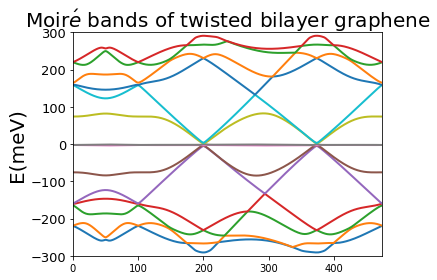

In [42]:
%matplotlib inline
for j in range(siteN+434,3*siteN-434):    
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-300,300)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

In [44]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 0.50           #degree
omega  = 110.7          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2970     #meV*angstrom, Fermi velocity for SLG
N      = 10             #truncate range
valley = -1             #+1 for K, -1 for K'
KDens  = 100            #density of k points, 100 is good.

#tune parameters
theta  = theta/180.0*np.pi 
I      = complex(0, 1)
ei120  = cos(2*pi/3) + valley*I*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*I*sin(2*pi/3)

b1m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, -np.sqrt(3)/2])
b2m    = 8*np.pi*sin(theta/2)/3/d*np.array([0.5, np.sqrt(3)/2])
qb     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([0, -1])
K1     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,-0.5])
K2     = 8*np.pi*sin(theta/2)/3/sqrt(3)/d*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)

#define Lattice
L = []
invL = np.zeros((2*N+1, 2*N+1), int)
def Lattice(n):
    count = 0
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])
            invL[i+n, j+n] = count
            count = count + 1
    for i in np.arange(-n, n+1):
        for j in np.arange(-n, n+1):
            L.append([i, j])

Lattice(N)
siteN = (2*N+1)*(2*N+1)
L = np.array(L)
def Hamiltonian(kx, ky):
    H = array(zeros((4*siteN, 4*siteN)), dtype=complex)
    for i in np.arange(siteN):
        #diagonal term
        ix = L[i, 0]
        iy = L[i, 1]
        ax = kx - valley*K1[0] + ix*b1m[0] + iy*b2m[0]
        ay = ky - valley*K1[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax + sin(theta/2) * ay
        qy =-sin(theta/2) * ax + cos(theta/2) * ay
         
        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        j = i + siteN
        H[2*j, 2*i]     = TqbD[0, 0]
        H[2*j, 2*i+1]   = TqbD[0, 1]
        H[2*j+1, 2*i]   = TqbD[1, 0]
        H[2*j+1, 2*i+1] = TqbD[1, 1]
        if (iy != valley*N):
            j = invL[ix+N, iy+valley*1+N] + siteN
            H[2*j, 2*i]     = TqtrD[0, 0]
            H[2*j, 2*i+1]   = TqtrD[0, 1]
            H[2*j+1, 2*i]   = TqtrD[1, 0]
            H[2*j+1, 2*i+1] = TqtrD[1, 1]
        if (ix != -valley*N):
            j = invL[ix-valley*1+N, iy+N] + siteN
            H[2*j, 2*i]     = TqtlD[0, 0]
            H[2*j, 2*i+1]   = TqtlD[0, 1]
            H[2*j+1, 2*i]   = TqtlD[1, 0]
            H[2*j+1, 2*i+1] = TqtlD[1, 1]
        

    for i in np.arange(siteN, 2*siteN):
        #diagnoal term
        j = i - siteN
        ix = L[j, 0]
        iy = L[j, 1]
        ax = kx  - valley*K2[0] + ix*b1m[0] + iy*b2m[0] 
        ay = ky  - valley*K2[1] + ix*b1m[1] + iy*b2m[1]

        qx = cos(theta/2) * ax - sin(theta/2) * ay
        qy = sin(theta/2) * ax + cos(theta/2) * ay

        H[2*i, 2*i+1] = hv * (valley*qx - I*qy)
        H[2*i+1, 2*i] = hv * (valley*qx + I*qy)

        #off-diagonal term
        H[2*j, 2*i]     = Tqb[0, 0]
        H[2*j, 2*i+1]   = Tqb[0, 1]
        H[2*j+1, 2*i]   = Tqb[1, 0]
        H[2*j+1, 2*i+1] = Tqb[1, 1]
        if (iy != (-valley*N)):
            j = invL[ix+N, iy-valley*1+N]
            H[2*j, 2*i]     = Tqtr[0, 0]
            H[2*j, 2*i+1]   = Tqtr[0, 1]
            H[2*j+1, 2*i]   = Tqtr[1, 0]
            H[2*j+1, 2*i+1] = Tqtr[1, 1]
        if (ix != valley*N):
            j = invL[ix+valley*1+N, iy+N]
            H[2*j, 2*i]     = Tqtl[0, 0]
            H[2*j, 2*i+1]   = Tqtl[0, 1]
            H[2*j+1, 2*i]   = Tqtl[1, 0]
            H[2*j+1, 2*i+1] = Tqtl[1, 1]


    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
#    eig_vecs_sorted = featurevector[:,eigenvalue.argsort()]
    e=eig_vals_sorted
    return e

kD = -qb[1]

AtoB = np.arange(-1/2, 1/2, 1/KDens)
BtoC = np.arange(-1, 0, 1/KDens)
CtoD = np.arange(0, sqrt(3), 1/KDens)
DtoA = np.arange(0, 1, 1/KDens)

AllK  = len(AtoB) + len(BtoC) + len(CtoD) + len(DtoA)
E  = np.zeros((AllK,4*siteN), float)


for i in range(0, len(AtoB)):
    k = AtoB[i]
    E[i] = np.real(Hamiltonian(sqrt(3)/2*kD, k*kD))
for i in range(len(AtoB), len(AtoB)+len(BtoC)):
    k = BtoC[i-len(AtoB)]
    E[i] = np.real(Hamiltonian(0, k*kD))
for i in range(len(AtoB)+len(BtoC), len(AtoB)+len(BtoC)+len(CtoD)):
    k = CtoD[i-len(AtoB)-len(BtoC)]
    E[i] = np.real(Hamiltonian(1.0/2*k*kD, -k*sqrt(3)/2*kD))
for i in range(len(AtoB)+len(BtoC)+len(CtoD), AllK):
    k = DtoA[i-len(AtoB)-len(BtoC)-len(CtoD)]
    E[i] = np.real(Hamiltonian(-sqrt(3)/2*k*kD, -1/2*k*kD))


%matplotlib qt

for j in range(0,4*siteN):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-80,80)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()

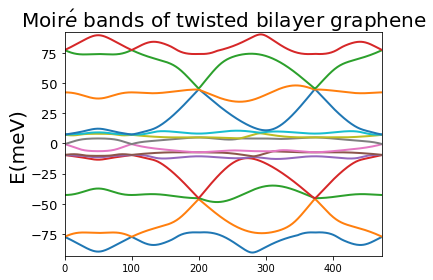

In [71]:
%matplotlib inline

for j in range(siteN+434,3*siteN-434):
    plt.plot(np.arange(AllK), E[:,j], linestyle="-", linewidth=2)
plt.title("Moir$\\'{e}$ bands of twisted bilayer graphene", fontsize=20)
plt.xlim(0, AllK)
plt.ylim(-93,92)
plt.yticks(fontsize=13)
plt.ylabel('E(meV)', fontsize=20)
plt.tight_layout()
plt.show()